<a href="https://colab.research.google.com/github/Mayank0195/Capstone_Project_ML_Regression_Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing drive on the colab notebook for the easy access of the data provided 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing the pathway for the Rossmann Stores Data.csv
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Regression/results.csv')
df1

,Date,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,WeekOfYear,DayOfYear,sales_key,AvgSales,cust_key,AvgCustomer,CompetitionOpen,Promo2Open,Promo2running,Sales
0,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,2380.483871,20131274,660.709677,0.0,0.000000,1,8.039802
1,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,2380.483871,20131274,834.000000,0.0,0.000000,1,8.039802
2,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,6567.064516,20131274,660.709677,0.0,0.000000,1,8.039802
3,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,6567.064516,20131274,834.000000,0.0,0.000000,1,8.039802
4,2013-01-01,335,2,0,1.0,1,b,a,90.0,1,...,1,1,20131335,12224.645161,20131335,2367.225806,0.0,0.000000,1,7.783641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395210,2015-07-31,1106,5,1,0.0,1,a,c,5330.0,1,...,31,212,201571106,4440.161290,201571106,480.741935,46.0,24.000000,1,8.682877
395211,2015-07-31,1107,5,1,0.0,0,a,a,1400.0,1,...,31,212,201571107,5428.000000,201571107,563.387097,37.0,64.142466,1,9.151969
395212,2015-07-31,1109,5,1,0.0,0,c,a,3490.0,1,...,31,212,201571109,4165.967742,201571109,387.548387,51.0,38.071233,1,8.568456
395213,2015-07-31,1111,5,1,0.0,1,a,a,1900.0,1,...,31,212,201571111,3927.806452,201571111,325.258065,13.0,24.000000,1,8.652248


In [4]:
df2 = df1.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395215 entries, 0 to 395214
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 395215 non-null  object 
 1   Store                395215 non-null  int64  
 2   DayOfWeek            395215 non-null  int64  
 3   Promo                395215 non-null  int64  
 4   StateHoliday         395215 non-null  float64
 5   SchoolHoliday        395215 non-null  int64  
 6   StoreType            395215 non-null  object 
 7   Assortment           395215 non-null  object 
 8   CompetitionDistance  395215 non-null  float64
 9   Promo2               395215 non-null  int64  
 10  Year                 395215 non-null  int64  
 11  Month                395215 non-null  int64  
 12  WeekOfYear           395215 non-null  int64  
 13  DayOfYear            395215 non-null  int64  
 14  sales_key            395215 non-null  int64  
 15  AvgSales         

In [6]:
df2 = df2.drop(['Date'], axis = 1)

In [7]:
df2

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,...,WeekOfYear,DayOfYear,sales_key,AvgSales,cust_key,AvgCustomer,CompetitionOpen,Promo2Open,Promo2running,Sales
0,274,2,0,1.0,1,b,b,3640.0,1,2013,...,1,1,20131274,2380.483871,20131274,660.709677,0.0,0.000000,1,8.039802
1,274,2,0,1.0,1,b,b,3640.0,1,2013,...,1,1,20131274,2380.483871,20131274,834.000000,0.0,0.000000,1,8.039802
2,274,2,0,1.0,1,b,b,3640.0,1,2013,...,1,1,20131274,6567.064516,20131274,660.709677,0.0,0.000000,1,8.039802
3,274,2,0,1.0,1,b,b,3640.0,1,2013,...,1,1,20131274,6567.064516,20131274,834.000000,0.0,0.000000,1,8.039802
4,335,2,0,1.0,1,b,a,90.0,1,2013,...,1,1,20131335,12224.645161,20131335,2367.225806,0.0,0.000000,1,7.783641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395210,1106,5,1,0.0,1,a,c,5330.0,1,2015,...,31,212,201571106,4440.161290,201571106,480.741935,46.0,24.000000,1,8.682877
395211,1107,5,1,0.0,0,a,a,1400.0,1,2015,...,31,212,201571107,5428.000000,201571107,563.387097,37.0,64.142466,1,9.151969
395212,1109,5,1,0.0,0,c,a,3490.0,1,2015,...,31,212,201571109,4165.967742,201571109,387.548387,51.0,38.071233,1,8.568456
395213,1111,5,1,0.0,1,a,a,1900.0,1,2015,...,31,212,201571111,3927.806452,201571111,325.258065,13.0,24.000000,1,8.652248


## **6. Store Sales Prediction**

In [8]:
dfd = df2.sample(n=50000, random_state=1)

In [9]:
# split features and labels
X = dfd.drop('Sales', axis=1)
y = dfd. Sales

In [10]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)
xl = X.copy()

In [11]:
# label nominal variables for tree based regression
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)


In [12]:
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

In [13]:
xd_train

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,...,CompetitionOpen,Promo2Open,Promo2running,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
158363,666,6,0,0.0,0,2700.0,1,2013,11,45,...,2.0,32.284932,0,0,0,1,0,0,0,1
44637,92,6,0,0.0,0,240.0,1,2013,3,11,...,0.0,40.175342,0,0,0,1,0,1,0,0
166890,22,6,0,0.0,0,1040.0,1,2013,11,47,...,2.0,17.753425,0,1,0,0,0,1,0,0
360902,272,4,1,0.0,0,16180.0,1,2015,5,21,...,142.0,49.610959,0,1,0,0,0,1,0,0
307024,1083,1,1,0.0,0,11540.0,1,2015,1,5,...,16.0,24.000000,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102082,471,4,1,0.0,0,5300.0,1,2013,7,29,...,0.0,44.317808,0,0,0,0,1,1,0,0
346387,1026,6,0,0.0,0,450.0,1,2015,4,16,...,46.0,28.635616,0,0,0,1,0,1,0,0
201653,216,6,0,0.0,0,190.0,1,2014,1,3,...,4.0,50.334246,0,0,0,1,0,1,0,0
357571,490,3,0,0.0,0,660.0,1,2015,5,20,...,25.0,7.397260,0,1,0,0,0,1,0,0


In [14]:
xd_test

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,...,CompetitionOpen,Promo2Open,Promo2running,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
218394,399,3,0,0.0,1,5360.0,1,2014,4,17,...,19.0,30.706849,1,1,0,0,0,1,0,0
23933,872,5,0,0.0,0,3860.0,1,2013,2,5,...,0.0,0.000000,0,1,0,0,0,0,0,1
330202,706,6,0,0.0,0,7830.0,1,2015,3,11,...,6.0,12.230137,1,0,0,0,1,1,0,0
34517,401,6,0,0.0,0,9200.0,1,2013,2,8,...,40.0,10.619178,0,1,0,0,0,0,0,1
17753,597,4,1,0.0,0,150.0,1,2013,1,4,...,52.0,12.690411,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181942,265,2,1,0.0,0,4580.0,1,2013,12,51,...,3.0,0.000000,0,1,0,0,0,1,0,0
339900,665,6,0,0.0,1,90.0,1,2015,4,14,...,28.0,48.000000,1,1,0,0,0,1,0,0
247410,902,3,0,0.0,0,310.0,1,2014,6,26,...,0.0,0.000000,0,1,0,0,0,1,0,0
165586,135,4,1,0.0,0,5190.0,1,2013,11,47,...,2.0,10.586302,0,0,0,0,1,1,0,0


In [15]:
yl_train

158363    8.943114
44637     8.637994
166890    8.083946
360902    8.852951
307024    8.754003
            ...   
102082    8.935377
346387    8.891099
201653    8.735204
357571    9.049350
42782     8.213924
Name: Sales, Length: 35000, dtype: float64

In [16]:
yl_test

218394    8.253488
23933     9.124347
330202    8.787678
34517     7.751045
17753     8.368461
            ...   
181942    9.061028
339900    8.917177
247410    8.409162
165586    8.615590
103005    7.813592
Name: Sales, Length: 15000, dtype: float64

In [17]:
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## **6.1 Linear Regression (OLS)**

In [18]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [19]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

a = linreg.score(xd_train, yd_train)
b = linreg.score(xd_test, yd_test)
c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)
print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)

Regresion Model Score : 0.6684336224556722 , Out of Sample Test Score : 0.6648058943579574
Training RMSE : 0.23446356735844595 Testing RMSE : 0.23651278421978153
Training MAPE : 1.9589629462038072 Testing MAPE : 1.9750885139396779
R2_train : 0.668434 , R2_test : 0.664806
Adj_r2_train : 0.668197 , Adj_r2_test : 0.664246


In [20]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['LinearRegression', a, b, c, d, e, f, g, h, i, j]
df_1= dict(zip(comparison_columns,metric_scores))

In [21]:
df_1

{'Adj_r2_test': 0.664246,
 'Adj_r2_train': 0.668197,
 'Model_Name': 'LinearRegression',
 'R2_test': 0.664806,
 'R2_train': 0.668434,
 'Regresion Model Score': 0.6684336224556722,
 'Sample Test Score': 0.6648058943579574,
 'Testing MAPE': 1.9750885139396779,
 'Testing RMSE': 0.23651278421978153,
 'Training MAPE': 1.9589629462038072,
 'Training RMSE': 0.23446356735844595}

## **6.2 Bayesian Ridge Regression**

In [22]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(xd_train, yd_train)

In [23]:
# validation

yd_predicted = rdgreg.predict(xd_train)
yd_test_predicted = rdgreg.predict(xd_test)

a = rdgreg.score(xd_train, yd_train)
b = rdgreg.score(xd_test, yd_test)
c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)
print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)

Regresion Model Score : 0.6684266531255033 , Out of Sample Test Score : 0.6648144263410941
Training RMSE : 0.23446603148861345 Testing RMSE : 0.23650977411922525
Training MAPE : 1.9588627673499448 Testing MAPE : 1.9749627302939214
R2_train : 0.668427 , R2_test : 0.664814
Adj_r2_train : 0.66819 , Adj_r2_test : 0.664255


In [24]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['BayesianRidge', a, b, c, d, e, f, g, h, i, j]
df2= dict(zip(comparison_columns,metric_scores))

In [25]:
df2

{'Adj_r2_test': 0.664255,
 'Adj_r2_train': 0.66819,
 'Model_Name': 'BayesianRidge',
 'R2_test': 0.664814,
 'R2_train': 0.668427,
 'Regresion Model Score': 0.6684266531255033,
 'Sample Test Score': 0.6648144263410941,
 'Testing MAPE': 1.9749627302939214,
 'Testing RMSE': 0.23650977411922525,
 'Training MAPE': 1.9588627673499448,
 'Training RMSE': 0.23446603148861345}

In [26]:
df_1 = pd.DataFrame([df_1])

In [27]:
df_1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246


In [28]:
df2 = pd.DataFrame([df2])

In [29]:
comparison_df1 = df_1.merge(df2, how='outer')
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255


## **6.3 LARS Lasso Regression**

In [30]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(xd_train, yd_train)

In [31]:
print("Regresion Model Score" , ":" , lasreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(xd_test, yd_test))

yd_predicted = lasreg.predict(xd_train)
yd_test_predicted = lasreg.predict(xd_test)

a = lasreg.score(xd_train, yd_train)
b = lasreg.score(xd_train, yd_train)
c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)


Regresion Model Score : 0.4687166561274967 , Out of Sample Test Score : 0.46302640927851946
Training RMSE : 0.2967927080988522 Testing RMSE : 0.29935250559262006
Training MAPE : 2.6347307408957943 Testing MAPE : 2.6512302471588236
R2_train : 0.468717 , R2_test : 0.463026
Adj_r2_train : 0.468337 , Adj_r2_test : 0.46213


In [32]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['LassoLars', a, b, c, d, e, f, g, h, i, j]
df3= dict(zip(comparison_columns,metric_scores))

In [33]:
df3 = pd.DataFrame([df3])

In [34]:
comparison_df1 = comparison_df1.merge(df3, how='outer')
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130


## **6.4 Decision Tree Regression**

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(xl_train, yl_train)

In [36]:
a = treereg.score(xl_train, yl_train)
b = treereg.score(xl_test, yl_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)   

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)

c = rmse(yl_train, yl_predicted)
d = rmse(yl_test, yl_test_predicted)
e = mape(yl_train, yl_predicted)
f = mape(yl_test, yl_test_predicted)
g = round(r2_score(yl_train, yl_predicted),6)
h = round(r2_score(yl_test, yl_test_predicted),6)
i = round(1 - (1-r2_score(yl_train, yl_predicted)) * (len(yl_train)-1)/(len(yl_train)-xl_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yl_test, yl_test_predicted)) * (len(yl_test)-1)/(len(yl_test)-xl_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)


Regresion Model Score : 0.8241543943162353 , Out of Sample Test Score : 0.7502233890969099
Training RMSE : 0.17074810252383216 Testing RMSE : 0.20416548203360887
Training MAPE : 1.406284397451301 Testing MAPE : 1.6792703477525805
R2_train : 0.824154 , R2_test : 0.750223
Adj_r2_train : 0.824054 , Adj_r2_test : 0.74989


In [37]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['DecisionTreeRegressor', a, b , c, d, e, f, g, h, i, j]
df4 = dict(zip(comparison_columns,metric_scores))

In [38]:
df4 = pd.DataFrame([df4])

In [39]:
comparison_df1 = comparison_df1.merge(df4, how='outer')
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130
3,DecisionTreeRegressor,0.824154,0.750223,0.170748,0.204165,1.406284,1.679270,0.824154,0.750223,0.824054,0.749890


## **6.5 Random Forest Regression**

In [40]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

In [41]:
a = rdfreg.score(xl_train, yl_train)
b = rdfreg.score(xl_test, yl_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)


c = rmse(yl_train, yl_predicted)
d = rmse(yl_test, yl_test_predicted)
e = mape(yl_train, yl_predicted)
f = mape(yl_test, yl_test_predicted)
g = round(r2_score(yl_train, yl_predicted),6)
h = round(r2_score(yl_test, yl_test_predicted),6)
i = round(1 - (1-r2_score(yl_train, yl_predicted)) * (len(yl_train)-1)/(len(yl_train)-xl_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yl_test, yl_test_predicted)) * (len(yl_test)-1)/(len(yl_test)-xl_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)




Regresion Model Score : 0.9753326735256614 , Out of Sample Test Score : 0.8334653938390908
Training RMSE : 0.17074810252383216 Testing RMSE : 0.20416548203360887
Training MAPE : 1.406284397451301 Testing MAPE : 1.6792703477525805
R2_train : 0.824154 , R2_test : 0.750223
Adj_r2_train : 0.824054 , Adj_r2_test : 0.74989


In [42]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['RandomForestRegressor', a, b, c, d, e, f, g, h, i, j]
df5= dict(zip(comparison_columns,metric_scores))

In [43]:
df5 = pd.DataFrame([df5])

In [44]:
comparison_df1 = comparison_df1.merge(df5, how='outer')
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130
3,DecisionTreeRegressor,0.824154,0.750223,0.170748,0.204165,1.406284,1.679270,0.824154,0.750223,0.824054,0.749890
4,RandomForestRegressor,0.975333,0.833465,0.170748,0.204165,1.406284,1.679270,0.824154,0.750223,0.824054,0.749890


## **6.6 K-Nearest Neighbors Regression**

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 10)
knnreg = knn.fit(xd_train, yd_train)

In [46]:
a = knnreg.score(xd_train, yd_train)
b =  knnreg.score(xd_test, yd_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" ,b)

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)


Regresion Model Score : 0.5816706310119596 , Out of Sample Test Score : 0.47721490226252594
Training RMSE : 0.26335969099067963 Testing RMSE : 0.295371122712172
Training MAPE : 2.3613190576784397 Testing MAPE : 2.641301845005007
R2_train : 0.581671 , R2_test : 0.477215
Adj_r2_train : 0.581372 , Adj_r2_test : 0.476342


In [47]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['KNeighborsRegressor', a, b, c, d, e, f, g, h, i, j]
df6 = dict(zip(comparison_columns,metric_scores))

In [48]:
for x in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

Regresion Model Score : 0.9665318320714792 , Out of Sample Test Score : 0.15079592078352555
Regresion Model Score : 0.786224471392569 , Out of Sample Test Score : 0.33713599503140623
Regresion Model Score : 0.705493749802024 , Out of Sample Test Score : 0.40258467631232353
Regresion Model Score : 0.6668916260793819 , Out of Sample Test Score : 0.43334235291362067
Regresion Model Score : 0.6408814433663594 , Out of Sample Test Score : 0.44756573121600296
Regresion Model Score : 0.6233878386865972 , Out of Sample Test Score : 0.4590440208268328
Regresion Model Score : 0.6087273379697182 , Out of Sample Test Score : 0.46786091698604704
Regresion Model Score : 0.5980783350310922 , Out of Sample Test Score : 0.47262416891886694


In [49]:
df6 = pd.DataFrame([df6])

In [50]:
comparison_df1 = comparison_df1.merge(df6, how='outer')
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130
3,DecisionTreeRegressor,0.824154,0.750223,0.170748,0.204165,1.406284,1.679270,0.824154,0.750223,0.824054,0.749890
4,RandomForestRegressor,0.975333,0.833465,0.170748,0.204165,1.406284,1.679270,0.824154,0.750223,0.824054,0.749890
5,KNeighborsRegressor,0.581671,0.477215,0.263360,0.295371,2.361319,2.641302,0.581671,0.477215,0.581372,0.476342


## **6.7 Random Forest Regression Tuned**

 In this we have done the hyperparamtere tunning of Random Forest to get the best parameters and to use these parameters to tune the regresssion model that will helps us to get best results.

In [51]:
# Create model
rf_tuned = RandomForestRegressor()

In [52]:
#import
from sklearn.model_selection import RandomizedSearchCV
#grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

#fitting
rf_random.fit(xl_train,yl_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  32.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  21.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  19.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  25.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  24.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  33.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 130, 150]},
                   random_state=42, verbose=2)

In [53]:
#best para
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 130}

In [54]:
#using the best parameter to tune the Random Forest Regresion to make it a Tuned random Forest
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=130, max_depth = 90, bootstrap=False, max_features='sqrt', min_samples_leaf=1, min_samples_split= 8)
rdfreg = rdf.fit(xl_train, yl_train)

In [ ]:
a = rdfreg.score(xl_train, yl_train)
b = rdfreg.score(xl_test, yl_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

c = rmse(yl_train, yl_predicted)
d = rmse(yl_test, yl_test_predicted)
e = mape(yl_train, yl_predicted)
f = mape(yl_test, yl_test_predicted)
g = round(r2_score(yl_train, yl_predicted),6)
h = round(r2_score(yl_test, yl_test_predicted),6)
i = round(1 - (1-r2_score(yl_train, yl_predicted)) * (len(yl_train)-1)/(len(yl_train)-xl_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yl_test, yl_test_predicted)) * (len(yl_test)-1)/(len(yl_test)-xl_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)

Regresion Model Score : 0.9771429617358998 , Out of Sample Test Score : 0.8485930390198047
Training RMSE : 0.06156021159003265 Testing RMSE : 0.1589568893227597
Training MAPE : 0.5166539804700834 Testing MAPE : 1.319140118271046
R2_train : 0.977143 , R2_test : 0.848593
Adj_r2_train : 0.97713 , Adj_r2_test : 0.848391


In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['RandomForestRegressorTuned', a, b, c, d, e, f, g, h, i, j]
df5= dict(zip(comparison_columns,metric_scores))

In [ ]:
df5 = pd.DataFrame([df5])

In [ ]:
df5

In [ ]:
comparison_df1 = comparison_df1.merge(df5, how='outer')
comparison_df1

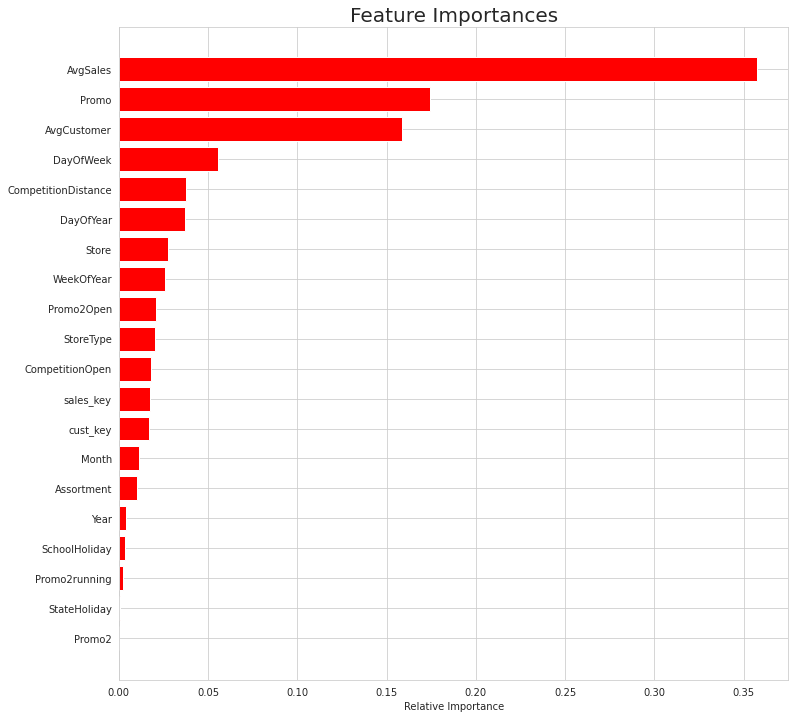

In [60]:
features = xl_test.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## **7. Model Performance and Evaluation**

In [61]:
#Taking a look of our final comparison dataframe
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130
3,DecisionTreeRegressor,0.824154,0.750223,0.170748,0.204165,1.406284,1.679270,0.824154,0.750223,0.824054,0.749890
4,RandomForestRegressor,0.975333,0.833465,0.170748,0.204165,1.406284,1.679270,0.824154,0.750223,0.824054,0.749890
5,KNeighborsRegressor,0.581671,0.477215,0.263360,0.295371,2.361319,2.641302,0.581671,0.477215,0.581372,0.476342
6,RandomForestRegressorTuned,0.977143,0.848593,0.061560,0.158957,0.516654,1.319140,0.977143,0.848593,0.977130,0.848391


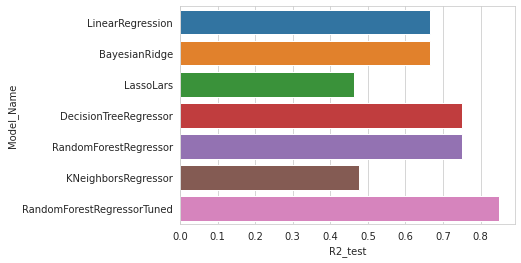

In [62]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df1['Model_Name'], x = comparison_df1['R2_test'])

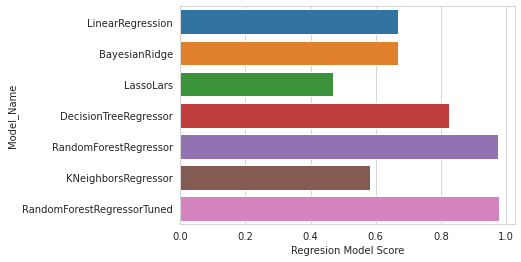

In [63]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df1['Model_Name'], x = comparison_df1['Regresion Model Score'])

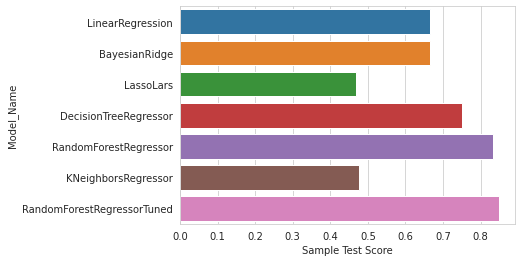

In [64]:
#visualising our comparison df for Test R2
sns.barplot(x=comparison_df1['Sample Test Score'], y = comparison_df1['Model_Name'])

### **Random Forest vs Decision Tree Models**

In [65]:
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130
3,DecisionTreeRegressor,0.824154,0.750223,0.170748,0.204165,1.406284,1.679270,0.824154,0.750223,0.824054,0.749890
4,RandomForestRegressor,0.975333,0.833465,0.170748,0.204165,1.406284,1.679270,0.824154,0.750223,0.824054,0.749890
5,KNeighborsRegressor,0.581671,0.477215,0.263360,0.295371,2.361319,2.641302,0.581671,0.477215,0.581372,0.476342
6,RandomForestRegressorTuned,0.977143,0.848593,0.061560,0.158957,0.516654,1.319140,0.977143,0.848593,0.977130,0.848391


In [66]:
comparison_df1.loc[:,["Model_Name","Sample Test Score","R2_test","Adj_r2_test"]]

,Model_Name,Sample Test Score,R2_test,Adj_r2_test
0,LinearRegression,0.664806,0.664806,0.664246
1,BayesianRidge,0.664814,0.664814,0.664255
2,LassoLars,0.468717,0.463026,0.462130
3,DecisionTreeRegressor,0.750223,0.750223,0.749890
4,RandomForestRegressor,0.833465,0.750223,0.749890
5,KNeighborsRegressor,0.477215,0.477215,0.476342
6,RandomForestRegressorTuned,0.848593,0.848593,0.848391


In [86]:
#Sample Test Score of the selected models
Decision_Tree_Sts = 0.750223
Random_Forest_Sts = 0.833465
Random_Forest_Tuned_Sts = 0.848593

In [87]:
#improvement % 
improvement_r = ((Random_Forest_Sts - Decision_Tree_Sts)/Decision_Tree_Sts)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

Model Performance
Improvement of 11.096 % was seen in Random Forest against Decision Tree.


### **Random Forest Tuned vs Random Forest Models**

In [88]:
#improvement % of tuned vs simple random forest
improvement_r = ((Random_Forest_Tuned_Sts - Random_Forest_Sts)/Random_Forest_Sts)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Model Performance
Improvement of 1.815 % was seen in Random Forest Tuned against Simple Random Forest.


### **Observation**

* Since the R^2 Score and the Adjusted_r^2_Score is similar in two of the three cases and hence we have to shift to the Sample Test Score.
* The Sample Test Score was seen in tuned Random Forest model with the value **0.848593** which was only **1.815 %** improved from a simple random forest model. 
* It seems like we have maxed out on performance with the data and these models.

### **8. Store wise Sales Predictions**

In [89]:
#importing the pathway for the Rossmann Stores Data.csv
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Regression/results.csv')
df1


,Date,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,WeekOfYear,DayOfYear,sales_key,AvgSales,cust_key,AvgCustomer,CompetitionOpen,Promo2Open,Promo2running,Sales
0,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,2380.483871,20131274,660.709677,0.0,0.000000,1,8.039802
1,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,2380.483871,20131274,834.000000,0.0,0.000000,1,8.039802
2,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,6567.064516,20131274,660.709677,0.0,0.000000,1,8.039802
3,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,6567.064516,20131274,834.000000,0.0,0.000000,1,8.039802
4,2013-01-01,335,2,0,1.0,1,b,a,90.0,1,...,1,1,20131335,12224.645161,20131335,2367.225806,0.0,0.000000,1,7.783641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395210,2015-07-31,1106,5,1,0.0,1,a,c,5330.0,1,...,31,212,201571106,4440.161290,201571106,480.741935,46.0,24.000000,1,8.682877
395211,2015-07-31,1107,5,1,0.0,0,a,a,1400.0,1,...,31,212,201571107,5428.000000,201571107,563.387097,37.0,64.142466,1,9.151969
395212,2015-07-31,1109,5,1,0.0,0,c,a,3490.0,1,...,31,212,201571109,4165.967742,201571109,387.548387,51.0,38.071233,1,8.568456
395213,2015-07-31,1111,5,1,0.0,1,a,a,1900.0,1,...,31,212,201571111,3927.806452,201571111,325.258065,13.0,24.000000,1,8.652248


In [90]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)

In [91]:
df1

DayOfWeek  Promo  StateHoliday  SchoolHoliday StoreType  \
Date       Store                                                            
2013-01-01 274            2      0           1.0              1         b   
           274            2      0           1.0              1         b   
           274            2      0           1.0              1         b   
           274            2      0           1.0              1         b   
           335            2      0           1.0              1         b   
...                     ...    ...           ...            ...       ...   
2015-07-31 1106           5      1           0.0              1         a   
           1107           5      1           0.0              0         a   
           1109           5      1           0.0              0         c   
           1111           5      1           0.0              1         a   
           1115           5      1           0.0              1         d   

                 Assortment  CompetitionDistance  Promo2  Year  Month  \
Date       Store                                                        
2013-01-01 274            b               3640.0       1  2013      1   
           274            b               3640.0       1  2013      1   
           274            b               3640.0       1  2013      1   
           274            b               3640.0       1  2013      1   
           335            a                 90.0       1  2013      1   
...                     ...                  ...     ...   ...    ...   
2015-07-31 1106           c               5330.0       1  2015      7   
           1107           a               1400.0       1  2015      7   
           1109           a               3490.0       1  2015      7   
           1111           a               1900.0       1  2015      7   
           1115           c               5350.0       1  2015      7   

                  WeekOfYear  DayOfYear  sales_key      AvgSales   cust_key  \
Date       Store                                                              
2013-01-01 274             1          1   20131274   2380.483871   20131274   
           274             1          1   20131274   2380.483871   20131274   
           274             1          1   20131274   6567.064516   20131274   
           274             1          1   20131274   6567.064516   20131274   
           335             1          1   20131335  12224.645161   20131335   
...                      ...        ...        ...           ...        ...   
2015-07-31 1106           31        212  201571106   4440.161290  201571106   
           1107           31        212  201571107   5428.000000  201571107   
           1109           31        212  201571109   4165.967742  201571109   
           1111           31        212  201571111   3927.806452  201571111   
           1115           31        212  201571115   6115.709677  201571115   

                  AvgCustomer  CompetitionOpen  Promo2Open  Promo2running  \
Date       Store                                                            
2013-01-01 274     660.709677              0.0    0.000000              1   
           274     834.000000              0.0    0.000000              1   
           274     660.709677              0.0    0.000000              1   
           274     834.000000              0.0    0.000000              1   
           335    2367.225806              0.0    0.000000              1   
...                       ...              ...         ...            ...   
2015-07-31 1106    480.741935             46.0   24.000000              1   
           1107    563.387097             37.0   64.142466              1   
           1109    387.548387             51.0   38.071233              1   
           1111    325.258065             13.0   24.000000              1   
           1115    405.032258             22.0   38.071233              0   

                     Sales  
Date   

In [92]:
dfd = df1.sample(n=50000, random_state=1)

In [93]:
dfd

,,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,sales_key,AvgSales,cust_key,AvgCustomer,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,,,,
2013-10-29,522,2,0,0.0,1,d,c,7160.0,1,2013,10,44,302,201310522,6126.612903,201310522,490.838710,11.0,32.054795,1,8.611230
2013-01-28,702,1,0,0.0,0,a,a,8550.0,1,2013,1,5,28,20131702,3528.387097,20131702,276.838710,136.0,38.794520,0,8.188411
2015-04-24,101,5,0,0.0,0,d,c,2440.0,1,2015,4,17,114,20154101,6425.133333,20154101,634.766667,19.0,34.849315,0,8.717355
2014-05-13,934,2,0,0.0,0,a,c,5460.0,1,2014,5,20,133,20145934,5294.354839,20145934,546.129032,8.0,37.380822,0,8.473659
2013-11-18,835,1,1,0.0,0,a,a,2890.0,1,2013,11,47,322,201311835,3971.000000,201311835,534.266667,71.0,0.000000,0,8.901230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-05,352,4,1,0.0,0,d,c,6360.0,1,2014,6,23,156,20146352,5245.366667,20146352,506.000000,9.0,20.087671,1,8.943506
2015-03-17,21,2,1,0.0,0,c,c,550.0,1,2015,3,12,76,2015321,5014.387097,2015321,448.096774,185.0,64.405479,0,8.705662
2013-01-07,804,1,1,0.0,0,c,c,2100.0,1,2013,1,2,7,20131804,3779.032258,20131804,352.645161,0.0,0.230137,1,8.712266


In [94]:
# split features and labels
X = dfd.drop('Sales', axis=1)
y = dfd. Sales

In [95]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)

In [96]:
# split training and test datasets from the new sample
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

In [97]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=130, max_depth = 90, bootstrap=False, max_features='sqrt', min_samples_leaf=1, min_samples_split= 8)
rdfreg = rdf.fit(xl_train, yl_train)

In [98]:
#predictions 
y_pred_test = rdfreg.predict(xl_test)
df = yl_test.copy()

In [99]:
df = pd.DataFrame(df)
df

,,Sales
Date,Store,
2014-04-23,399,8.253488
2013-02-01,872,9.124347
2015-03-14,706,8.787678
2013-02-23,401,7.751045
2013-01-24,597,8.368461
...,...,...
2013-12-17,265,9.061028
2015-04-04,665,8.917177
2014-06-25,902,8.409162


In [100]:
df['Pred_Sales'] = y_pred_test.tolist()

In [101]:
df

,,Sales,Pred_Sales
Date,Store,,
2014-04-23,399,8.253488,8.395823
2013-02-01,872,9.124347,8.735244
2015-03-14,706,8.787678,8.624257
2013-02-23,401,7.751045,8.350617
2013-01-24,597,8.368461,8.536219
...,...,...,...
2013-12-17,265,9.061028,8.945478
2015-04-04,665,8.917177,8.799706
2014-06-25,902,8.409162,8.237834


In [103]:
#locating
df.loc[('2014-06-25')]

,Sales,Pred_Sales
Store,,
1044,8.538759,8.479766
253,8.303009,8.320870
338,8.626227,8.638203
300,8.636042,8.698487
975,8.640295,8.739004
255,8.436417,8.477498
745,8.646993,8.721364
899,8.365440,8.311674
629,8.887238,8.820277


# **9. Conclusion and Recommendations**

## **Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

he work here forecasts the sales of the various Rossmann stores across Europe  and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:
* there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

**Recommendations**
* More stores should be encouraged for promotion. 
* Store type B should be increased in number.
* There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.